In [64]:
import numpy as np
import random
import time
import sys
from pyskiplist import SkipList

In [65]:
sys.setrecursionlimit(100000000)
sys.getrecursionlimit()

100000000

In [66]:
searchList=[]
for i in range(1,10**5+1):
    searchList.append(random.randint(1,10**7))

In [67]:
len(searchList)

100000

# Splay tree

In [68]:
"""Splay tree
Logan Ingalls <log@plutor.org>
Sept 3, 2012
Note that I only implemented insert and find. Delete is trivial,
and isn't the interesting part of splay trees. Some of these
algorithms would be simpler, but I chose to do this without parent
links from the tree nodes.
Example output on my desktop computer:
Building trees
Done building
Searched for 20 items 20000x in splay tree: 4.1 sec
Searched for 20 items 20000x in binary tree: 11.1 sec
"""

from random import shuffle
import time

class BinaryTreeNode:
    """A node in a binary tree. Each node has a val attribute,
    as well as left and right descendents. No parent links because
    I'm a masochist."""
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

    def __str__(self):
        return ("node[%s]" % self.val)

class BinaryTree:
    """A basic binary tree."""
    def __init__(self):
        self.root = None

    def insert(self, val, parent=None):
        """Insert a new value in the tree. Takes one argument
        (the value to insert). Recursive binary search."""
        if (parent == None):
            parent = self.root
        if (parent == None):
            # root is null, make this the new root, done
            self.root = BinaryTreeNode(val)
            return
        elif (val < parent.val):
            if (parent.left == None):
                # insert to the left of the parent
                parent.left = BinaryTreeNode(val)
                return
            else:
                # search under the left
                self.insert(val, parent.left)
        else:
            if (parent.right == None):
                # insert to the right of the parent
                parent.right = BinaryTreeNode(val)
                return
            else:
                # search under the right
                self.insert(val, parent.right)

    def find(self, val, node=None):
        """Find if a value is in the tree. Takes one argument
        (the value to find). If the value is in the tree, returns
        the node object. Otherwise returns None."""
        if (node == None):
            node = self.root
        if (node == None):
            # obviously it's not in an empty tree
            return None
        elif (val == node.val):
            return node
        elif (val < node.val):
            # Search left
            if (node.left != None):
                leftrv = self.find(val, node.left)
                if leftrv != None:
                    return leftrv
        elif (val > node.val):
            if (node.right != None):
                rightrv = self.find(val, node.right)
                if rightrv != None:
                    return rightrv
        return None

class SplayTree(BinaryTree):
    """Implementation of a splay tree. Splay trees are self-organizing.
    They look identical to binary trees, but when nodes are found, they
    are moved towards the root (one or two levels closer). Still
    O(lg n), but a shallower search on average when not all values are
    searched for equally."""
    def find(self, val, node=None, p=None, g=None, gg=None):
        """Find if a value is in the tree. Takes one argument
        (the value to find). If the value is in the tree, returns
        the node object. Otherwise returns None."""
        if (node == None):
            node = self.root
        if (node == None):
            # obviously it's not in an empty tree
            return None
        elif (val == node.val):
            # If it's found, we need to move things around
            if (p != None):
                if (g == None):
                    # Zig: swap node with its parent
                    self.rotateup(node, p, g)
                elif ((g.left == p and p.left == node) or
                      (g.right == p and p.right == node)):
                    # Zig-zig: swap parent with grandparent
                    self.rotateup(p, g, gg)
                    # Then swap node with parent
                    self.rotateup(node, p, gg)
                else:
                    # Zig-zag: swap node with parent
                    self.rotateup(node, p, g)
                    # Then swap node with grandparent
                    self.rotateup(node, g, gg)
            return node
        elif (val < node.val):
            # Search left
            if (node.left != None):
                leftrv = self.find(val, node.left, node, p, g)
                if leftrv != None:
                    return leftrv
        elif (val > node.val):
            if (node.right != None):
                rightrv = self.find(val, node.right, node, p, g)
                if rightrv != None:
                    return rightrv
        return None

    def rotateup(self, node, parent, gp=None):
        """Swap a node with its parent, keeping all child nodes
        (and grandparent node) in order."""
        if node == parent.left: 
            parent.left = node.right
            node.right = parent
            if (self.root == parent):
                self.root = node
        elif node == parent.right:
            parent.right = node.left
            node.left = parent
            if (self.root == parent):
                self.root = node
        else:
            print("This is impossible")

        if (gp != None):
            if (gp.right == parent):
                gp.right = node
            elif (gp.left == parent):
                gp.left = node

def test_splay_tree(treesize=100000, iters=20000):
    """Just a simple test harness to demonstrate the speed of
    splay trees when a few items are searched for very frequently."""
    # Build a binary tree and a splay tree
    print("Building trees")
    bintree = BinaryTree()
    spltree = SplayTree()
    x = [i for i in range(0, treesize)]
    shuffle(x)
    for n in x:
        bintree.insert(n)
        spltree.insert(n)
    print("Done building")
    searches = x[-20:]

    # Search the splay tree 1000 times
    t1 = time.time()
    for i in range(0, iters):
        for n in searches:
            node = spltree.find(n)
            if (node == None):
                print("ERROR: %d" % n)
    t2 = time.time()
    print("Searched for 20 items %dx in splay tree: %.1f sec" % (iters, t2-t1))

    # Search the binary tree 1000 times
    t1 = time.time()
    for i in range(0, iters):
        for n in searches:
            node = bintree.find(n)
            if (node == None):
                print("ERROR: %d" % n)
    t2 = time.time()
    print("Searched for 20 items %dx in binary tree: %.1f sec" % (iters, t2-t1))

In [69]:
st = SplayTree()

In [70]:
stPartDuration = []
for i in range(0,10**4):
    stStart = time.process_time()
    for j in range(1000*i+1,1000*(i+1)+1):        
        st.insert(random.randint(1,10**7))
    stEnd = time.process_time()
    stDuration = stEnd - stStart
    stPartDuration.append(stDuration)  

In [71]:
stSStart = time.process_time()
for i in range(0,10**5):
    st.find(searchList[i])
stSEnd = time.process_time()
stSDuration = stSEnd - stSStart
stSDuration

3.578125

Splay tree source code:https://gist.github.com/Plutor/3615362

# Skiplist

In [72]:
s = SkipList()

In [73]:
sPartDuration = []
for i in range(0,10**4):
    sStart = time.process_time()
    for j in range(1000*i+1,1000*(i+1)+1):        
        s.insert(j,random.randint(1,10**7))
    sEnd = time.process_time()
    sDuration = sEnd - sStart
    sPartDuration.append(sDuration)   

In [74]:
sSStart = time.process_time()
for i in range(0,10**5):
    s.search(searchList[i])
sSEnd = time.process_time()
sSDuration = sSEnd - sSStart
sSDuration

2.875

# Red black tree

In [75]:
class rbnode(object):
    """
    A node in a red black tree. See Cormen, Leiserson, Rivest, Stein 2nd edition pg 273.
    """
    
    def __init__(self, key):
        "Construct."
        self._key = key
        self._red = False
        self._left = None
        self._right = None
        self._p = None
    
    key = property(fget=lambda self: self._key, doc="The node's key")
    red = property(fget=lambda self: self._red, doc="Is the node red?")
    left = property(fget=lambda self: self._left, doc="The node's left child")
    right = property(fget=lambda self: self._right, doc="The node's right child")
    p = property(fget=lambda self: self._p, doc="The node's parent")
    
    def __str__(self):
        "String representation."
        return str(self.key)
    

    def __repr__(self):
        "String representation."
        return str(self.key)

class rbtree(object):
    """
    A red black tree. See Cormen, Leiserson, Rivest, Stein 2nd edition pg 273.
    """
    
    
    def __init__(self, create_node=rbnode):
        "Construct."
        
        self._nil = create_node(key=None)
        "Our nil node, used for all leaves."
        
        self._root = self.nil
        "The root of the tree."
        
        self._create_node = create_node
        "A callable that creates a node."


    root = property(fget=lambda self: self._root, doc="The tree's root node")
    nil = property(fget=lambda self: self._nil, doc="The tree's nil node")
    
    
    def search(self, key, x=None):
        """
        Search the subtree rooted at x (or the root if not given) iteratively for the key.
        
        @return: self.nil if it cannot find it.
        """
        if None == x:
            x = self.root
        while x != self.nil and key != x.key:
            if key < x.key:
                x = x.left
            else:
                x = x.right
        return x

    
    def minimum(self, x=None):
        """
        @return: The minimum value in the subtree rooted at x.
        """
        if None == x:
            x = self.root
        while x.left != self.nil:
            x = x.left
        return x

    
    def maximum(self, x=None):
        """
        @return: The maximum value in the subtree rooted at x.
        """
        if None == x:
            x = self.root
        while x.right != self.nil:
            x = x.right
        return x

    
    def insert_key(self, key):
        "Insert the key into the tree."
        self.insert_node(self._create_node(key=key))
    
    
    def insert_node(self, z):
        "Insert node z into the tree."
        y = self.nil
        x = self.root
        while x != self.nil:
            y = x
            if z.key < x.key:
                x = x.left
            else:
                x = x.right
        z._p = y
        if y == self.nil:
            self._root = z
        elif z.key < y.key:
            y._left = z
        else:
            y._right = z
        z._left = self.nil
        z._right = self.nil
        z._red = True
        self._insert_fixup(z)
        
        
    def _insert_fixup(self, z):
        "Restore red-black properties after insert."
        while z.p.red:
            if z.p == z.p.p.left:
                y = z.p.p.right
                if y.red:
                    z.p._red = False
                    y._red = False
                    z.p.p._red = True
                    z = z.p.p
                else:
                    if z == z.p.right:
                        z = z.p
                        self._left_rotate(z)
                    z.p._red = False
                    z.p.p._red = True
                    self._right_rotate(z.p.p)
            else:
                y = z.p.p.left
                if y.red:
                    z.p._red = False
                    y._red = False
                    z.p.p._red = True
                    z = z.p.p
                else:
                    if z == z.p.left:
                        z = z.p
                        self._right_rotate(z)
                    z.p._red = False
                    z.p.p._red = True
                    self._left_rotate(z.p.p)
        self.root._red = False

    
    def _left_rotate(self, x):
        "Left rotate x."
        y = x.right
        x._right = y.left
        if y.left != self.nil:
            y.left._p = x
        y._p = x.p
        if x.p == self.nil:
            self._root = y
        elif x == x.p.left:
            x.p._left = y
        else:
            x.p._right = y
        y._left = x
        x._p = y


    def _right_rotate(self, y):
        "Left rotate y."
        x = y.left
        y._left = x.right
        if x.right != self.nil:
            x.right._p = y
        x._p = y.p
        if y.p == self.nil:
            self._root = x
        elif y == y.p.right:
            y.p._right = x
        else:
            y.p._left = x
        x._right = y
        y._p = x


    def check_invariants(self):
        "@return: True iff satisfies all criteria to be red-black tree."
        
        def is_red_black_node(node):
            "@return: num_black"
            # check has _left and _right or neither
            if (node.left and not node.right) or (node.right and not node.left):
                return 0, False

            # check leaves are black
            if not node.left and not node.right and node.red:
                return 0, False

            # if node is red, check children are black
            if node.red and node.left and node.right:
                if node.left.red or node.right.red:
                    return 0, False
                    
            # descend tree and check black counts are balanced
            if node.left and node.right:
                
                # check children's parents are correct
                if self.nil != node.left and node != node.left.p:
                    return 0, False
                if self.nil != node.right and node != node.right.p:
                    return 0, False

                # check children are ok
                left_counts, left_ok = is_red_black_node(node.left)
                if not left_ok:
                    return 0, False
                right_counts, right_ok = is_red_black_node(node.right)
                if not right_ok:
                    return 0, False

                # check children's counts are ok
                if left_counts != right_counts:
                    return 0, False
                return left_counts, True
            else:
                return 0, True
                
        num_black, is_ok = is_red_black_node(self.root)
        return is_ok and not self.root._red
                



def write_tree_as_dot(t, f, show_nil=False):
    "Write the tree in the dot language format to f."
    def node_id(node):
        return 'N%d' % id(node)
    
    def node_color(node):
        if node.red:
            return "red"
        else:
            return "black"
    
    def visit_node(node):
        "Visit a node."
        print(f, "  %s [label=\"%s\", color=\"%s\"];" % (node_id(node), node, node_color(node)))
        if node.left:
            if node.left != t.nil or show_nil:
                visit_node(node.left)
                print(f, "  %s -> %s ;" % (node_id(node), node_id(node.left)))
        if node.right:
            if node.right != t.nil or show_nil:
                visit_node(node.right)
                print(f, "  %s -> %s ;" % (node_id(node), node_id(node.right)))
             
    print(f, "// Created by rbtree.write_dot()")
    print(f, "digraph red_black_tree {")
    visit_node(t.root)
    print(f, "}")




def test_tree(t, keys):
    "Insert keys one by one checking invariants and membership as we go."
    assert t.check_invariants()
    for i, key in enumerate(keys):
        for key2 in keys[:i]:
            assert t.nil != t.search(key2)
        for key2 in keys[i:]:
            assert (t.nil == t.search(key2)) ^ (key2 in keys[:i])
        t.insert_key(key)
        assert t.check_invariants()
    

if '__main__' == __name__:
    import os, sys, numpy.random as R
    def write_tree(t, filename):
        "Write the tree as an SVG file."
        f = open('%s.dot' % filename, 'w')
        write_tree_as_dot(t, f)
        f.close()
        os.system('dot %s.dot -Tsvg -o %s.svg' % (filename, filename))
        

Red black tree source code:(http://code.activestate.com/recipes/576817-red-black-tree/)

In [76]:
rb = rbtree()

In [77]:
rbPartDuration = []
for i in range(0,10**4):
    rbStart = time.process_time()
    for j in range(1000*i+1,1000*(i+1)+1):        
        rb.insert_key(random.randint(1,10**7))
    rbEnd = time.process_time()
    rbDuration = rbEnd - rbStart
    rbPartDuration.append(rbDuration)

In [78]:
rbSStart = time.process_time()
for i in range(0,10**5):
    rb.search(searchList[i])
rbSEnd = time.process_time()
rbSDuration = rbSEnd - rbSStart
rbSDuration

2.8125

# Hash table

In [79]:
ht = {}
htPartDuration = []

In [80]:
for i in range(0,10**4):
    htStart = time.process_time()
    for j in range(1000*i+1,1000*(i+1)+1):
        ht[random.randint(1,10**7)] = random.randint(1,10**7)
    htEnd = time.process_time()
    htDuration = htEnd - htStart
    htPartDuration.append(htDuration)
timesum = sum(htPartDuration)
timesum

54.46875

In [81]:
htSStart = time.process_time()
for i in range(0,10**5):
    searchList[i] in ht
htSEnd = time.process_time()
htSDuration = htSEnd - htSStart
htSDuration

0.046875

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

In [83]:
stSumDuration = sum(stPartDuration)
sSumDuration = sum(sPartDuration)
rbSumDuration = sum(rbPartDuration)
htSumDuration = sum(htPartDuration)
print(stSumDuration,sSumDuration,rbSumDuration,htSumDuration)
print(stSDuration,sSDuration,rbSDuration,htSDuration)

330.84375 321.3125 482.859375 54.46875
3.578125 2.875 2.8125 0.046875


In [85]:
insertTime = [stSumDuration,sSumDuration,rbSumDuration,htSumDuration]
searchTime = [stSDuration,sSDuration,rbSDuration,htSDuration]

# 新增時間

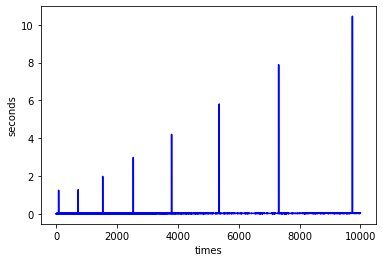

In [86]:
#每千次
plt.xlabel("times")
plt.ylabel("seconds")
plt.plot(stPartDuration,'b') #Splay tree

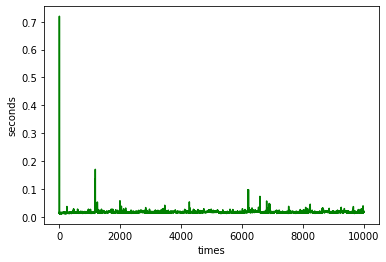

In [113]:
plt.xlabel("times")
plt.ylabel("seconds")
plt.plot(sPartDuration,'g') #Skiplist

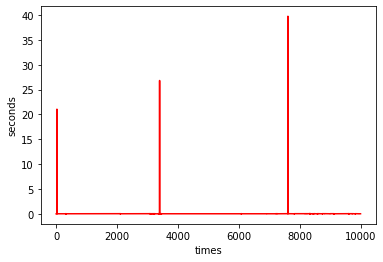

In [88]:
plt.xlabel("times")
plt.ylabel("seconds")
plt.plot(rbPartDuration,'r') #Red black tree

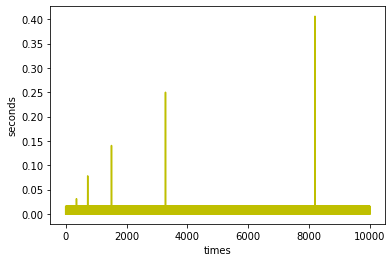

In [89]:
plt.xlabel("times")
plt.ylabel("seconds")
plt.plot(htPartDuration,'y') #Hash table

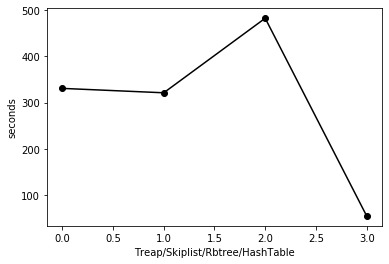

In [90]:
#總長度
plt.xlabel("Treap/Skiplist/Rbtree/HashTable")
plt.ylabel("seconds")
plt.plot(insertTime,'ko-')

# 搜尋時間

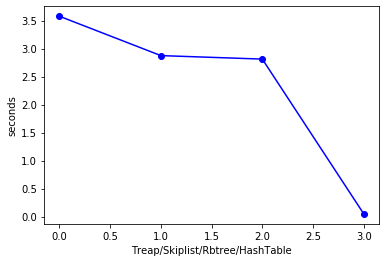

In [91]:
plt.xlabel("Treap/Skiplist/Rbtree/HashTable")
plt.ylabel("seconds")
plt.plot(searchTime,'bo-')